# Лабораторная работа 1.2 и 1.3

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import datasets
%matplotlib inline

Загружаем датасет

In [94]:
diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['progression'] = diabetes.target

In [95]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разделение на обучающие и тестовые данные

In [96]:
train, test = train_test_split(data, test_size=0.2)

Выбор признаков. Выбираем BMI - индекс массы тела

In [97]:
feature = ['bmi']
target_feature = ['progression']

In [98]:
X_train = train[feature]
Y_train = train[target_feature]
X_test = test[feature]
Y_test = test[target_feature]

In [99]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)


print(f"Свободный коэффициент: {model.intercept_[0]:.4f}")
print(f"Коэффициент: {model.coef_[0][0]:.4f}")

Свободный коэффициент: 152.4742
Коэффициент: 936.1325


График

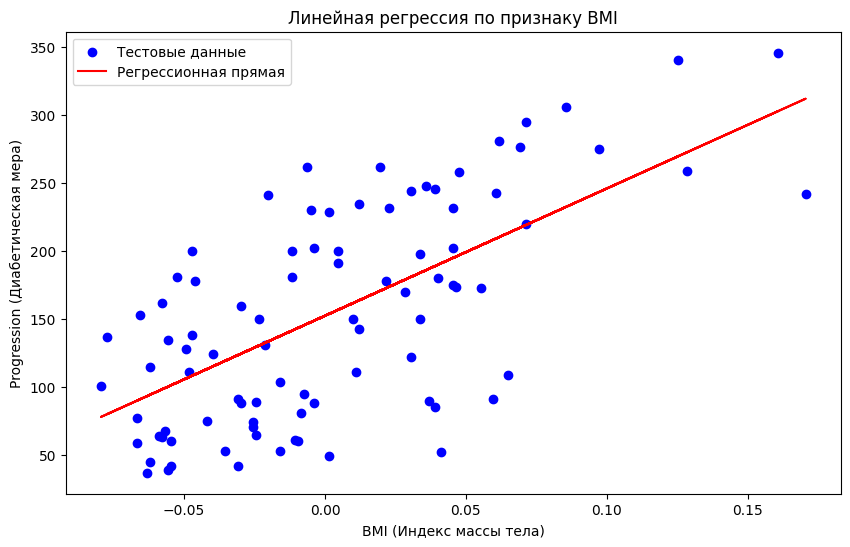

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color="b", label="Тестовые данные")
plt.plot(X_test, Y_pred_test, color="r", label="Регрессионная прямая")


plt.xlabel("BMI (Индекс массы тела)")
plt.ylabel("Progression (Диабетическая мера)")
plt.title("Линейная регрессия по признаку BMI")
plt.legend()


plt.show()

### Своя реализация

In [101]:
def coef(X_train, Y_train):  # нахождение коэффициентов регрессионной прямой
    sum_x, sum_y, sum_xy, sum_x2 = 0, 0, 0, 0
    
    x = [x for x in np.nditer(X_train)]
    y = [y for y in np.nditer(Y_train)]
    
    N = len(y)

    for i in range(N):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i]*y[i]
        sum_x2 += x[i]**2

    b = (sum_xy - sum_x*sum_y/N)/(sum_x2 - sum_x**2/N)
    a = (sum_y - b*sum_x)/N

    return (a, b)


def f(x, a, b):
    return a + b*x

Коэффициенты

In [102]:
a, b = coef(X_train, Y_train)

print(f"Свободный коэффициент:", a)
print(f"Коэффициент:", b)

Свободный коэффициент: 152.47421805540299
Коэффициент: 936.1324973507751


График

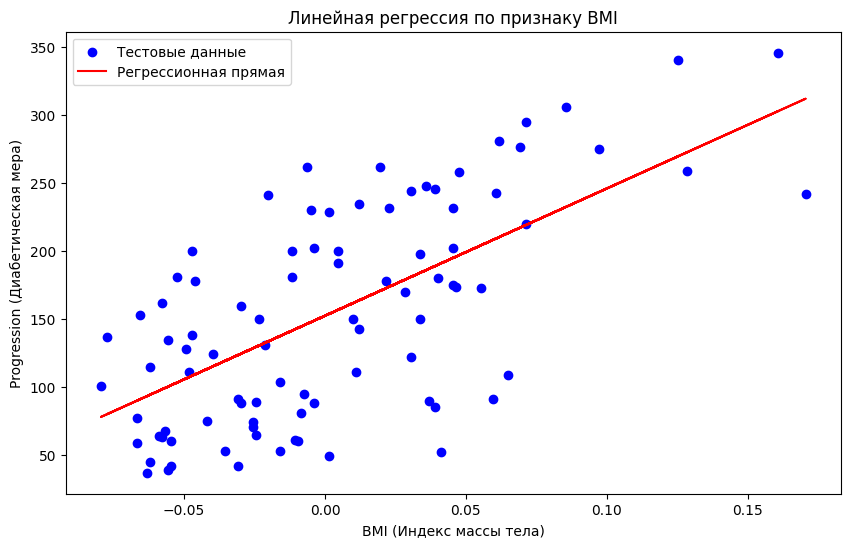

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color="b", label="Тестовые данные")
plt.plot(X_test, f(X_test, a, b), color="r", label="Регрессионная прямая")


plt.xlabel("BMI (Индекс массы тела)")
plt.ylabel("Progression (Диабетическая мера)")
plt.title("Линейная регрессия по признаку BMI")
plt.legend()


plt.show()

### Результаты предсказаний

In [104]:
print(Y_pred_test)

[[ 90.16202784]
 [189.04156886]
 [101.26075183]
 [129.51204927]
 [ 80.07227876]
 [141.61974817]
 [108.32357619]
 [153.72744707]
 [123.45819982]
 [183.99669432]
 [ 94.19792748]
 [130.52102418]
 [108.32357619]
 [141.61974817]
 [103.27870165]
 [303.05573351]
 [144.6466729 ]
 [ 94.19792748]
 [101.26075183]
 [145.6556478 ]
 [146.66462271]
 [132.53897399]
 [107.31460128]
 [195.09541831]
 [ 97.2248522 ]
 [163.81719615]
 [ 98.23382711]
 [ 78.05432894]
 [128.50307436]
 [115.38640055]
 [100.25177693]
 [186.01464414]
 [ 98.23382711]
 [142.62872308]
 [272.78648626]
 [210.23004194]
 [191.05951868]
 [204.17619249]
 [172.89797033]
 [269.75956154]
 [196.10439322]
 [197.11336813]
 [129.51204927]
 [219.31081612]
 [173.90694524]
 [209.22106703]
 [133.5479489 ]
 [213.25696667]
 [156.7543718 ]
 [161.79924634]
 [ 90.16202784]
 [187.02361905]
 [195.09541831]
 [219.31081612]
 [178.95181978]
 [148.68257253]
 [195.09541831]
 [232.42748993]
 [190.05054377]
 [119.42230019]
 [137.58384854]
 [113.36845073]
 [180.96

### Метрики

In [105]:
mae = metrics.mean_absolute_error(Y_test, Y_pred_test)
mape = metrics.mean_absolute_percentage_error(Y_test, Y_pred_test)
r2 = metrics.r2_score(Y_test, Y_pred_test)

print("MAE ", mae)
print("MAPE ", mape)
print("R2 ", r2)

MAE  51.417073414551126
MAPE  0.5027888990346704
R2  0.4408158086332201
